* Relevant Information:

       -- These data are the results of a chemical analysis of
          wines grown in the same region in Italy but derived from three
          different cultivars.
          The analysis determined the quantities of 13 constituents
          found in each of the three types of wines. 


       -- The attributes are:
        1) Alcohol
        2) Malic acid
        3) Ash
        4) Alcalinity of ash  
        5) Magnesium
        6) Total phenols
        7) Flavanoids
        8) Nonflavanoid phenols
        9) Proanthocyanins
        10)Color intensity
        11)Hue
        12)OD280/OD315 of diluted wines
        13)Proline            

* Number of Instances

        class 1 59
        class 2 71
        class 3 48

* Number of Attributes 
	
        13

* For Each Attribute:

        All attributes are continuous
	
        No statistics available, but suggest to standardise
        variables for certain uses (e.g. for us with classifiers
        which are NOT scale invariant)

        NOTE: 1st attribute is class identifier (1-3)



In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [28]:
#import Data

names=\
["class"
,'Alcohol'
,'Malic acid'
,'Ash'
,'Alcalinity of ash ' 
,'Magnesium'
,'Total phenols'
,'Flavanoids'
,'Nonflavanoid phenols'
,'Proanthocyanins'
,'Color intensity'
,'Hue'
,'OD280/OD315 of diluted wines'
,'Proline']

data=pd.read_csv("wine.data",names=names)
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
#shuffle data(Because the data is sorted by class)
data=data.sample(axis=0,frac=1)
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
125,2,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378
90,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
102,2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
114,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
156,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480
22,1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
113,2,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434


In [30]:
#convert to numpy array
x=np.array(data[data.columns[1:14]])
y=np.array(data[data.columns[0]])

print(x.shape,y.shape)

(178, 13) (178,)


In [31]:
print(f"number of features = {x[0].shape[0]}\nlabels = {np.unique(y)}")

number of features = 13
labels = [1 2 3]


In [32]:
#data normalization
mu=x.mean(axis=0)
sigma=x.std(axis=0)

x_norm=(x-mu)/sigma



In [33]:
x_train,x_test=x_norm[0:int(len(x)*.7)],x_norm[int(len(x)*.7):]
y_train,y_test=y[0:int(len(x)*.7)],y[int(len(x)*.7):]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(124, 13)
(124,)
(54, 13)
(54,)


In [34]:
print(f"x[0]:{x_train[0]}\n\nX shape: {x_train[0].shape}")

x[0]:[-1.14955978 -0.15830138 -0.7183361   0.45194578 -1.03505509  0.48853108
  0.6231926   0.06563943 -0.4220751  -0.9940847  -0.42754369  0.94395616
 -1.17473827]

X shape: (13,)


In [35]:
#Set up the neural network layers
tf.random.set_seed(5)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(26,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax'),
    
])

In [36]:
#Compile the model
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],)

In [37]:
#Train the model
model.fit(x_train,y_train,epochs=60)

Epoch 1/60
4/4 [==============================] - 0s 1ms/step - loss: 1.5282 - accuracy: 0.3145
Epoch 2/60
4/4 [==============================] - 0s 1ms/step - loss: 1.4315 - accuracy: 0.3790
Epoch 3/60
4/4 [==============================] - 0s 1ms/step - loss: 1.3419 - accuracy: 0.4194
Epoch 4/60
4/4 [==============================] - 0s 1ms/step - loss: 1.2579 - accuracy: 0.5000
Epoch 5/60
4/4 [==============================] - 0s 2ms/step - loss: 1.1817 - accuracy: 0.5161
Epoch 6/60
4/4 [==============================] - 0s 2ms/step - loss: 1.1088 - accuracy: 0.5484
Epoch 7/60
4/4 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.5645
Epoch 8/60
4/4 [==============================] - 0s 2ms/step - loss: 0.9773 - accuracy: 0.6048
Epoch 9/60
4/4 [==============================] - 0s 1ms/step - loss: 0.9186 - accuracy: 0.6210
Epoch 10/60
4/4 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.6694
Epoch 11/60
4/4 [======================

In [38]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print(f"\nTest accuracy: {round(test_acc*100,2)}%")

2/2 - 0s - loss: 0.1187 - accuracy: 1.0000

Test accuracy: 100.0%


In [41]:
#Make predictions
predictions =model.predict(x_test)
predictions[:10]

array([[0.06018296, 0.02503642, 0.07485989, 0.83992076],
       [0.10608073, 0.04703555, 0.6851922 , 0.16169152],
       [0.02599302, 0.8836735 , 0.07199614, 0.01833734],
       [0.00440406, 0.00674264, 0.9877158 , 0.00113754],
       [0.2391886 , 0.06673394, 0.36645392, 0.32762358],
       [0.02172054, 0.6867773 , 0.28271043, 0.00879173],
       [0.01634306, 0.00849863, 0.09856146, 0.87659687],
       [0.05586521, 0.7735848 , 0.1476263 , 0.02292364],
       [0.01273871, 0.95428264, 0.02626936, 0.00670945],
       [0.01668092, 0.97742647, 0.00294879, 0.00294387]], dtype=float32)

In [42]:
#In which Test set instance did the model make a wrong prediction?
for i in range(len(x_test)):
    if (predictions[i].argmax()!=y_test[i]):
        wrong=i
print(wrong)        

40


In [43]:
import matplotlib.pyplot as plt

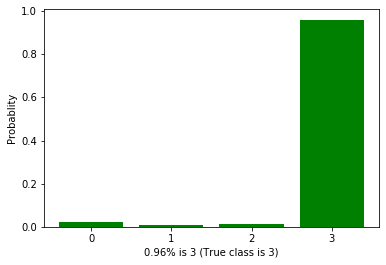

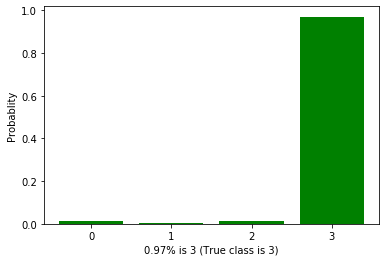

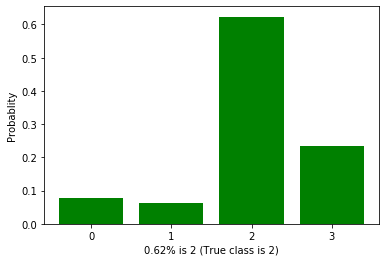

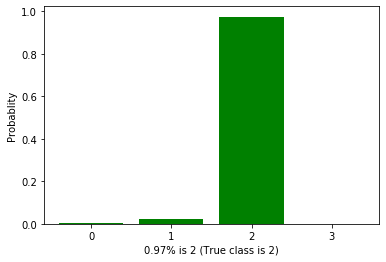

In [44]:
for i in range(wrong-1,wrong+3):
    if (predictions[i].argmax()==y_test[i]):
        color='green'
    else:
        color='red'
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ylabel('Probablity')
    plt.xlabel(f'{str(predictions[i].max())[:4]}% is {predictions[i].argmax()} (True class is {y_test[i]})')
    plt.xticks(range(4),list(range(4)))

    ax.bar([0,1,2,3], predictions[i],  color=color, label='Bid')
    ;

In [45]:
#parameters and their shapes
w1=model.weights[0].numpy()
b1=model.weights[1].numpy()
w2=model.weights[2].numpy()
b2=model.weights[3].numpy()
print(f"X{1} dimension is =(1,13)")
print(f"W{1} dimension is ={w1.shape}\nb{1} dimension is ={b1.shape}")
print(f"W{2} dimension is ={w2.shape}\nb{2} dimension is ={b2.shape}")

X1 dimension is =(1,13)
W1 dimension is =(13, 26)
b1 dimension is =(26,)
W2 dimension is =(26, 4)
b2 dimension is =(4,)


In [46]:

z1=np.matmul(x_test[0],w1)+b1
a1=tf.keras.activations.relu(z1).numpy()
z2=np.matmul(a1,w2)+b2
a2=np.exp(z2)/np.sum(np.exp(z2))

print(f"a2:         {a2} \n\nTensorFlow: {predictions[0]}")

a2:         [0.06018296 0.02503642 0.07485989 0.83992074] 

TensorFlow: [0.06018296 0.02503642 0.07485989 0.83992076]


In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 108       
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________
